In [45]:
import pandas as pd
import numpy as np
from scipy.stats import bootstrap
import researchpy as rp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
data = pd.read_csv(r"rawdata\NCBirths2004.csv")

In [6]:
weight = data['Weight']

In [50]:
boots = bootstrap(data= (weight,), statistic= np.mean, n_resamples= 9999, axis=0, random_state= 2002)

In [32]:

# The bootstrap standard error of a statistic is the standard deviation of the bootstrap distribution of that statistic.
rp.summarize(data= boots.bootstrap_distribution, stats= ["Mean", "Variance", "SD", "CI", 'Min', 'Max', 'Range', "Kurtosis", "Skew"], decimals=2)

,Mean,Variance,SD,95% Conf. Interval,Min,Max,Range,Kurtosis,Skew
0,3448.13,234.51,15.31,"[3447.83, 3448.43]",3393.05,3509.32,116.27,3.03,0.03


<Axes: ylabel='Count'>

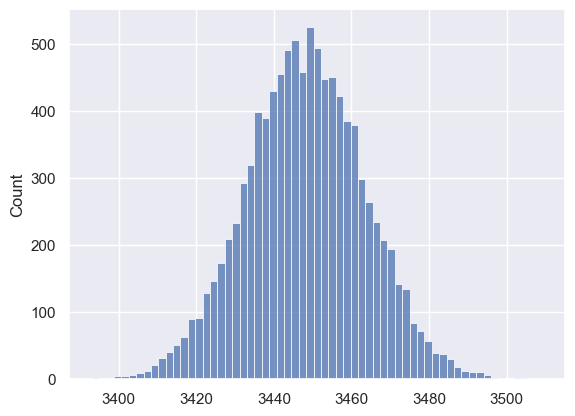

In [28]:
sns.set_theme(style='darkgrid')
sns.histplot(boots.bootstrap_distribution)

In [51]:
boots.confidence_interval

ConfidenceInterval(low=3418.209489105163, high=3478.54041067138)

In [34]:
bang = pd.read_csv("rawdata\Bangladesh.csv")

In [38]:
rp.summarize(bang, stats= ["Mean", "Variance", "SD", "CI", 'Min', 'Max', 'Range', "Kurtosis", "Skew"], decimals=2)

,Name,Mean,Variance,SD,95% Conf. Interval,Min,Max,Range,Kurtosis,Skew
0,Arsenic,125.32,88789.39,297.98,Arsenic,0.5,2400.0,2399.5,30.22,4.79
1,Chlorine,78.08,44108.06,210.02,Chlorine,1.0,1550.0,1549.0,27.16,4.75
2,Cobalt,0.5,0.14,0.38,Cobalt,0.05,3.18,3.13,15.03,2.76


In [52]:
boots = bootstrap(data= (bang['Arsenic'],), statistic= np.mean, n_resamples= 9999, axis=0, random_state= 2002)

In [48]:
rp.summarize(boots.bootstrap_distribution, stats= ["Mean", "Variance", "SD", "CI", 'Min', 'Max', 'Range', "Kurtosis", "Skew"], decimals=2)

,Mean,Variance,SD,95% Conf. Interval,Min,Max,Range,Kurtosis,Skew
0,125.28,326.82,18.08,"[124.92, 125.63]",69.77,196.19,126.43,3.08,0.3


<Axes: ylabel='Count'>

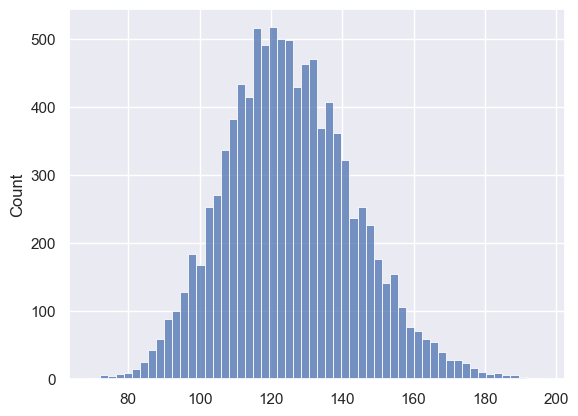

In [42]:
sns.set_theme(style='darkgrid')
sns.histplot(boots.bootstrap_distribution)

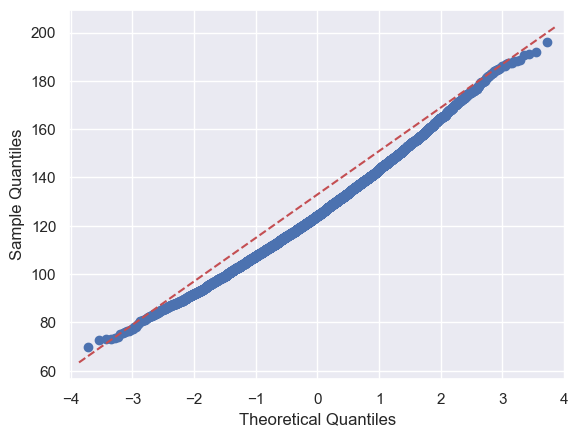

In [47]:
fig, ax = plt.subplots()
sm.qqplot(boots.bootstrap_distribution, ax= ax)
line = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="r")


In [53]:
boots.confidence_interval

ConfidenceInterval(low=96.79645850087105, high=171.66875527331771)

# Two-sample bootstrapping

In [54]:
skate = pd.read_csv("rawdata\Skateboard.csv")

In [66]:
male = skate.loc[skate['Experimenter']=='Male','Testosterone']
female = skate.loc[skate['Experimenter']=='Female','Testosterone']

In [67]:
def difmean(data1,data2):
    return np.mean(data1) - np.mean(data2)

In [71]:

bootstrap_results = bootstrap((female, male), difmean, n_resamples=9999, random_state=2102)

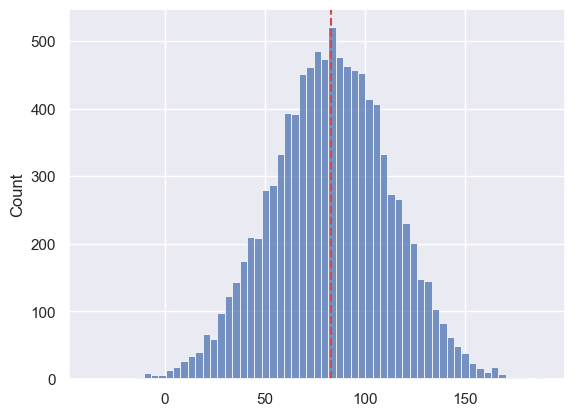

In [74]:
ax = sns.histplot(data= bootstrap_results.bootstrap_distribution)

ax.axvline(np.mean(bootstrap_results.bootstrap_distribution), color= 'r', linestyle= '--')

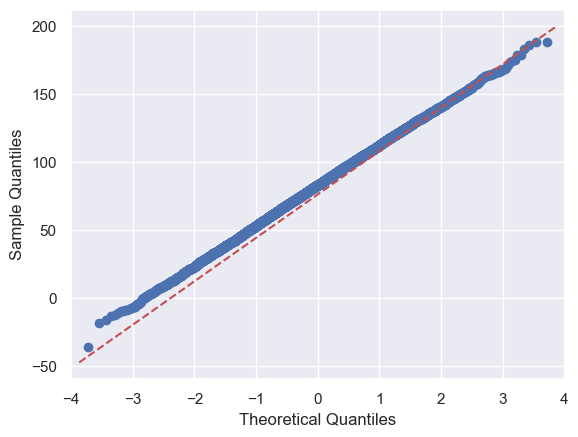

In [77]:
fig, ax = plt.subplots()
sm.qqplot(bootstrap_results.bootstrap_distribution, ax= ax)
line = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="r")

In [78]:
# uma confiança de 95% de que os níveis de testosterona em quem se exibe para mulheres é 
bootstrap_results.confidence_interval
# superior a quem se exibe para homens

ConfidenceInterval(low=22.955287459895743, high=138.4647258999246)

## Dados pareados

In [80]:
diving = pd.read_csv("rawdata\Diving2017.csv")

In [82]:
semi = diving['Semifinal']
final = diving['Final']

In [83]:
boots_results = bootstrap((final, semi), difmean, n_resamples=9999, random_state=2102, paired= True)

In [87]:
boots_results.confidence_interval

ConfidenceInterval(low=-5.908333333333333, high=31.5011366072181)

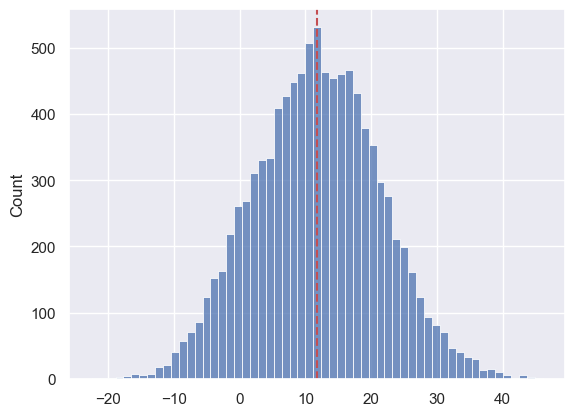

In [86]:
ax = sns.histplot(data= boots_results.bootstrap_distribution)

ax.axvline(np.mean(boots_results.bootstrap_distribution), color= 'r', linestyle= '--')

bias 139